In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_circles
X,y = make_circles(100,factor=0.1,noise=0.1)

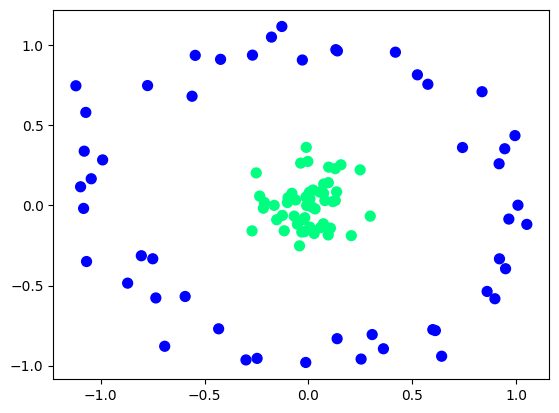

In [6]:
plt.scatter(X[:,0],X[:,1],c = y,s=50,cmap='winter')

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)


#### If we use kernel as linear

In [8]:
from sklearn.svm import SVC
model = SVC(kernel='linear')

In [14]:
model.fit(X_train,y_train.ravel())

SVC(kernel='linear')

In [15]:
y_pred=model.predict(X_test)

In [16]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
accuracy_score(y_pred,y_test)

0.3

In [19]:
from sklearn.svm import SVC
model2 = SVC(kernel='rbf')

In [20]:
model2.fit(X_train,y_train)

SVC()

In [23]:
y_pred2 = model2.predict(X_test)

In [24]:
y_pred2

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
      dtype=int64)

In [25]:
accuracy_score(y_pred2,y_test)

1.0

####

#### plynomial

In [26]:
from sklearn.svm import SVC

In [40]:
model3 = SVC(kernel='poly',degree=2)
model3.fit(X_train,y_train)

SVC(degree=2, kernel='poly')

In [41]:
y_pred3 = model3.predict(X_test)

In [42]:
y_pred3

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
      dtype=int64)

In [43]:
accuracy_score(y_pred3,y_test)

1.0

#### Data visualisation

In [47]:
from matplotlib.colors import ListedColormap

In [54]:
zero_one_colormap = ListedColormap(('blue','red'))
def plot_decision_boundary(X,y,model):
    X1 = np.arange(X[:,0].min()-1,X[:,0].max()+1,0.01)
    X2 = np.arange(X[:,1].min()-1,X[:,1].max()+1,0.01)

    XX,YY = np.meshgrid(X1,X2)

    plt.contourf(XX,YY,model.predict(np.array([XX.ravel(),YY.ravel()]).T).reshape(XX.shape),
                alpha = 0.75,
                cmap = zero_one_colormap)
    plt.xlim(XX.min(),XX.max())
    plt.ylim(YY.min(),YY.max())
    for i,j in enumerate(np.unique(y)):
        plt.scatter(X[y == j,0],X[y==j,1],c = (zero_one_colormap)(i),label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    return plt.show()


C:\Users\soumi\AppData\Local\Temp\ipykernel_16360\1677333521.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[y == j,0],X[y==j,1],c = (zero_one_colormap)(i),label = j)


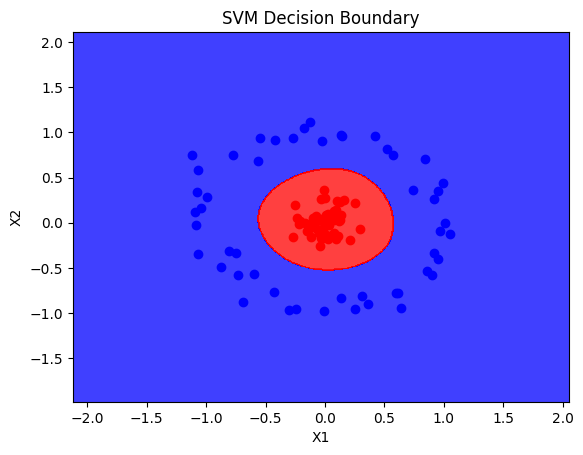

In [59]:
plot_decision_boundary(X,y,model2)

In [64]:
##  for 3D plot

def plot_3D_plot(X,y):
    r = np.exp(-(X**2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:,0],X[:,1],r,c=y,s=100,cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

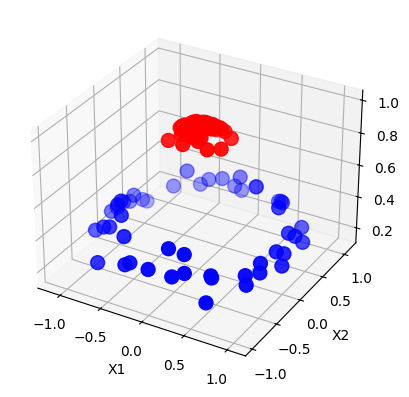

In [65]:
plot_3D_plot(X,y)